# Librarys

In [150]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


np.random.seed(13)


# Data for example

In [8]:
df = pd.read_csv("data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

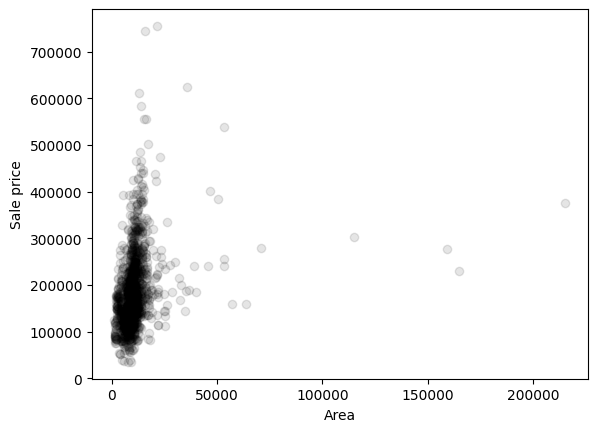

In [10]:
plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()

# Linear Regression

f_wb = w * x[i] + b

In [11]:
np.zeros(df["LotArea"].shape)

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
def calculate_model_output(w, b, x):
    f_wb = np.zeros(x.shape)
    for i in range (len(x)):
        f_wb[i] = w * x[i] + b

    return f_wb

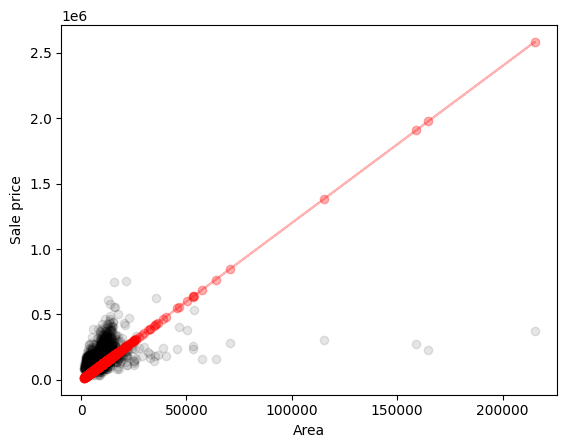

In [13]:
len(df)

outputs = calculate_model_output(12, -220, df["LotArea"])

plt.scatter(df["LotArea"], df["SalePrice"], color="black", alpha=0.1)
plt.plot(df["LotArea"], outputs, color="red", marker="o", alpha=0.3)
plt.ylabel('Sale price')
plt.xlabel('Area')
plt.show()


# Cost function

J(w, b) = 1/(2m) * SUM(y'(i) - y(i))^2


In [14]:
def cost_function(w, b, x, y):
    """
    Computes the cost for linear regression

    Args:
        w (scalar):             parameter of the model
        b (scalar):             parameter of the model
        x (ndarray): Shape (m,) variable
        y (ndarray): Shape (m,) target

    Returns:
        cost (scalar): 1/(2*m) * SUM(y(i) - x(i))^2
    """
    
    
    predict = calculate_model_output(w, b, x)
    m = len(x)
    cost_i = 0
    for i in range (len(x)):
        cost_i += (y[i] - predict[i])**2

    return (1/m) * cost_i

In [15]:
cost_function(10, 200, df["LotArea"], df["SalePrice"])

17789417357.436985

One variable changes, another remains constant

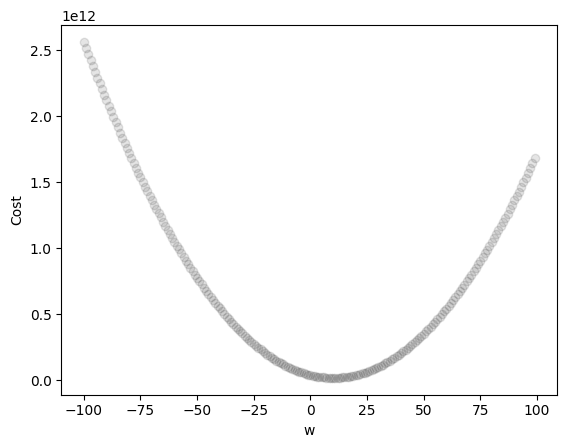

In [16]:
for i in range(-100, 100):
    cost = cost_function(i, 200, df["LotArea"], df["SalePrice"])
    plt.scatter(i, cost, color="black", alpha=0.1)


plt.ylabel('Cost')
plt.xlabel('w')
plt.show()

Both variables change

In [17]:
w_i = []
b_i = []
costs = []

for i in range(-25, 50):
    for j in range(-25, 50):
        w_i.append(i)
        b_i.append(j)
        cost = cost_function(i, j, df["LotArea"], df["SalePrice"])
        costs.append(cost)

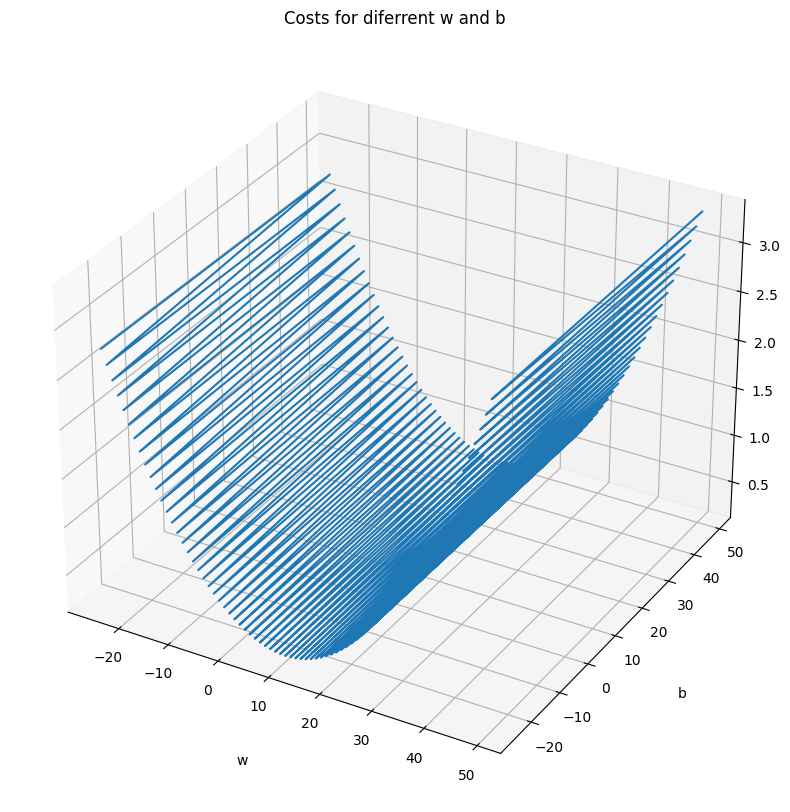

In [18]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot3D(w_i, b_i, costs)

ax.set_xlabel('w', labelpad=20)
ax.set_ylabel('b', labelpad=20)
ax.set_zlabel('cost', labelpad=20)

ax.set_title('Costs for diferrent w and b')
plt.show()

# Gradient Descent

In [157]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient using formula

    Args:
        x (_type_): _description_
        y (_type_): _description_
        w (_type_): _description_
        b (_type_): _description_

    Returns:
        _type_: _description_
    """
    
    m = len(x)
    j_wb_der_w = 0
    j_wb_der_b = 0

    # Calculate the sum from the formula
    for i in range(m):
        f_wb_i = w * x[i] + b
        
        # Sum of partial derivatives of cost for this example
        j_wb_der_w += (f_wb_i - y[i]) * x[i]
        j_wb_der_b += (f_wb_i - y[i])

    j_wb_der_w = (1/m) * j_wb_der_w
    j_wb_der_b = (1/m) * j_wb_der_b
    
    return j_wb_der_w, j_wb_der_b


def gradient_descent(x, y, lr=0.0000001, thold=1e-6, iterations=100):
    w = np.random.rand()
    b = np.random.rand()

    temp_w = 0
    temp_b = 0
    current_cost = float('inf')
    previous_cost = None
    w_i = []
    b_i = []
    costs = []
    it = 0
    
    while it < iterations:
        j_wb_der_w, j_wb_der_b = compute_gradient(x, y, w, b)
        temp_w = w - lr * j_wb_der_w
        temp_b = b - lr * j_wb_der_b
        
        current_cost = cost_function(w, b, x, y) 
        
        if previous_cost and abs(previous_cost-current_cost)<=thold:
            break
        
        previous_cost = current_cost
        
        w_i.append(temp_w)
        b_i.append(temp_b)
        costs.append(current_cost)
        
        w = temp_w
        b = temp_b
        
        it += 1
        
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {it}: Cost {current_cost}, Weight \
        {w}, Bias {b}")
    
    iterations_array = np.arange(1, len(costs) + 1)
    
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(w_i, costs)
    plt.scatter(w_i, costs, marker='o', color='red')
    plt.xlabel('w', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('Costs for different w')
    plt.show()
    
    # Plot
    plt.figure(figsize=(10,10))
    plt.plot(iterations_array, costs)
    plt.scatter(iterations_array, costs, marker='o', color='red')
    plt.xlabel('iterations', labelpad=20)
    plt.ylabel('cost', labelpad=20)
    plt.title('Costs by iterations')
    plt.show()
    
    
    # Plot
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot3D(w_i, b_i, costs)
    ax.scatter(w_i, b_i, costs, color='red')  # Adicione scatter em 3D
    ax.plot
    ax.set_xlabel('w', labelpad=20)
    ax.set_ylabel('b', labelpad=20)
    ax.set_zlabel('cost', labelpad=20)
    ax.set_title('Costs for different w and b')
    plt.show()
    
    
    return w, b

Iteration 1: Cost 35435217792.59496, Weight         2.8170954834208515, Bias 0.17932500910287025
Iteration 2: Cost 28808858148.135193, Weight         4.336834640139028, Bias 0.1794763032105454
Iteration 3: Cost 24675033435.14506, Weight         5.53718376393554, Bias 0.17961161448262827
Iteration 4: Cost 22096165446.500504, Weight         6.485266211095586, Bias 0.17973430188920225
Iteration 5: Cost 20487350227.853165, Weight         7.234098620428638, Bias 0.17984701847554901
Iteration 6: Cost 19483698073.77629, Weight         7.825555596337832, Bias 0.17995185972007174
Iteration 7: Cost 18857574180.065517, Weight         8.292711330874862, Bias 0.18005048071315596
Iteration 8: Cost 18466969596.304955, Weight         8.661689107959994, Bias 0.18014418870959384
Iteration 9: Cost 18223292676.464584, Weight         8.953122113786026, Bias 0.18023401623009025
Iteration 10: Cost 18071275919.98667, Weight         9.18330724172081, Bias 0.1803207787996771
Iteration 11: Cost 17976440944.82525

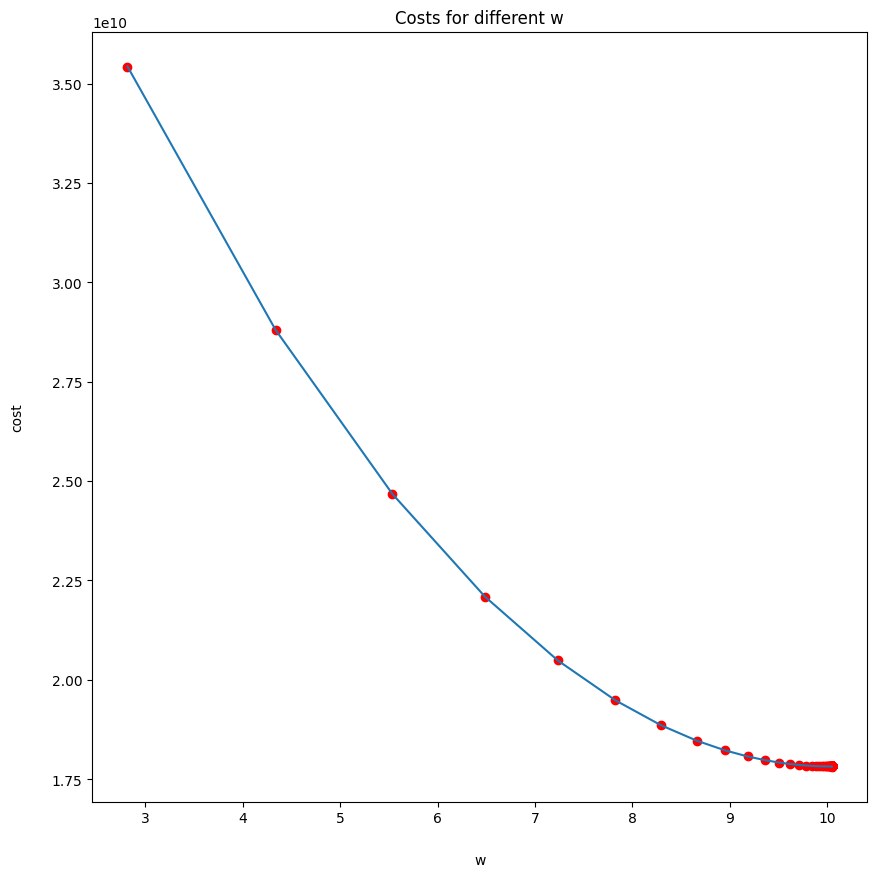

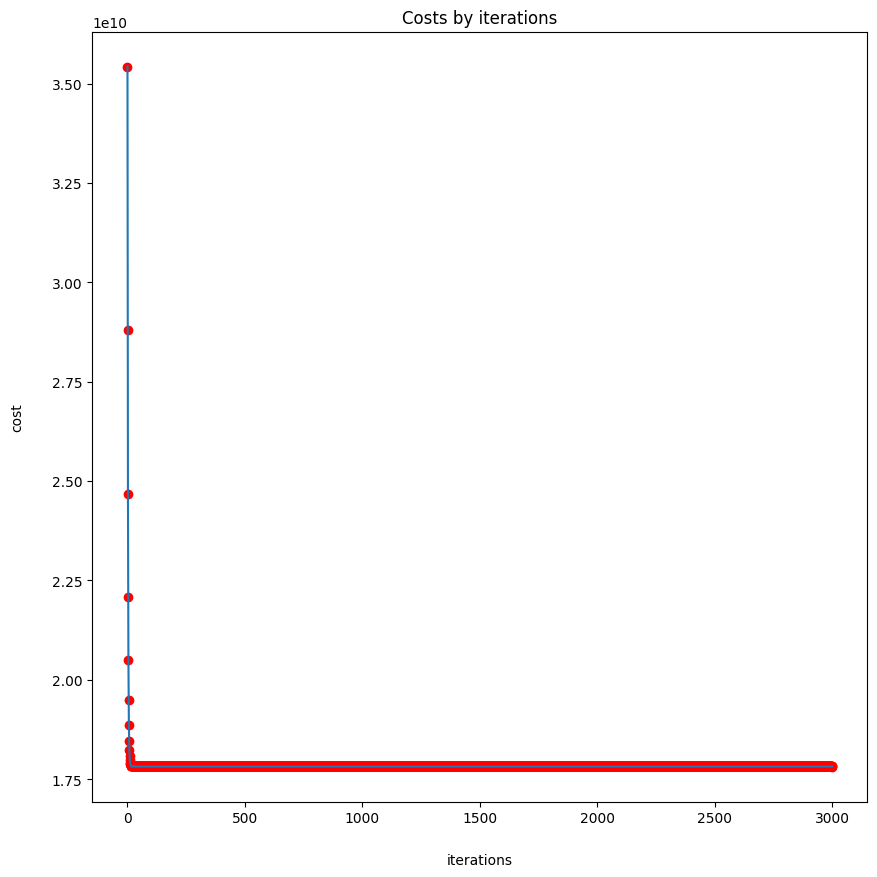

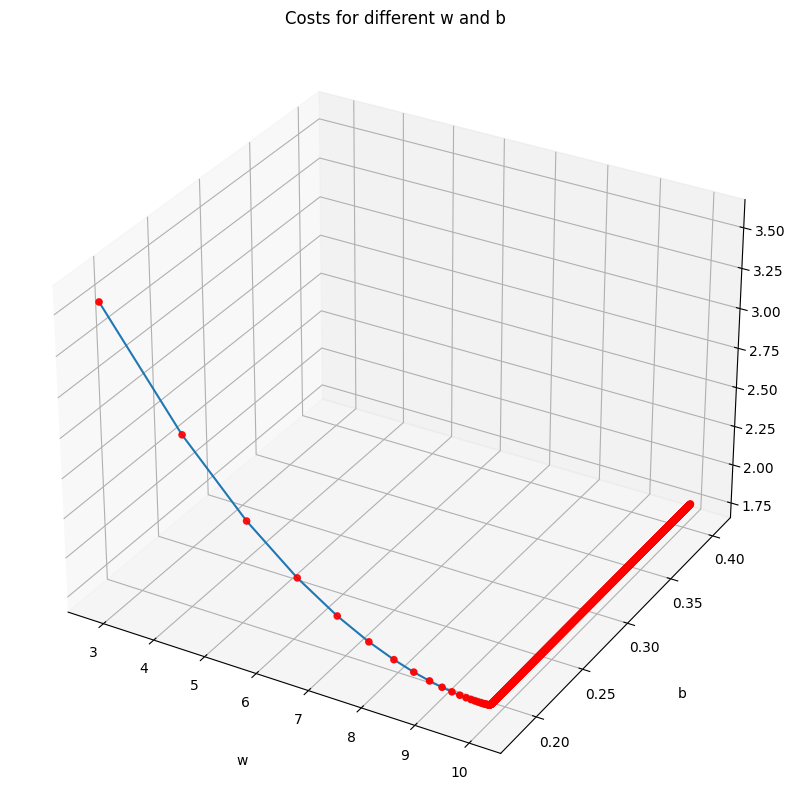

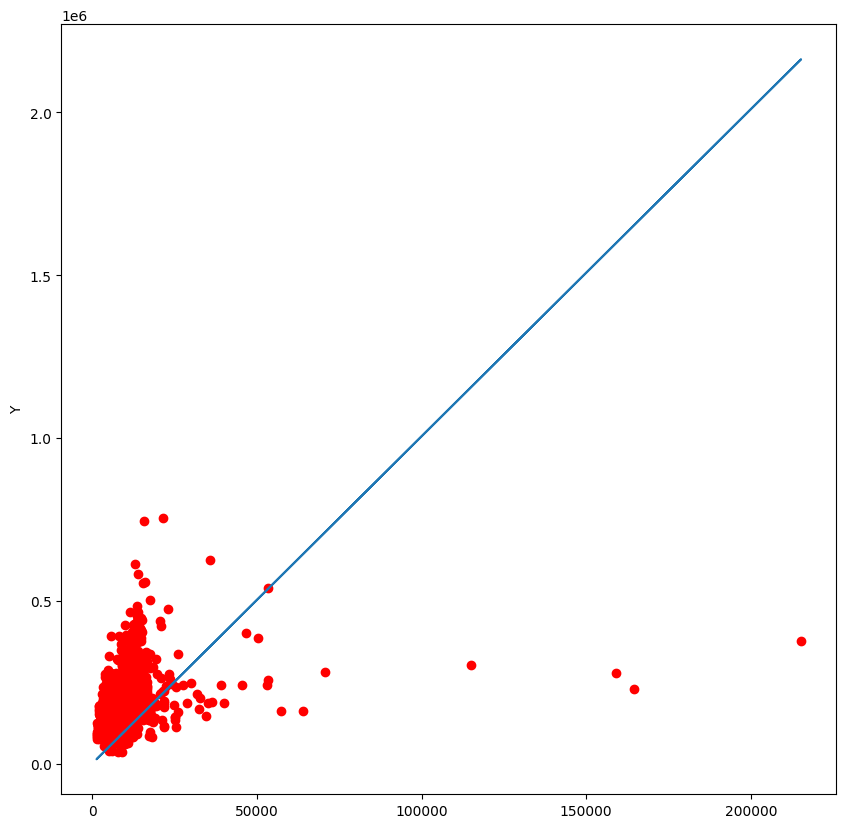

In [158]:
# Data example

X = df["LotArea"]
Y =  df['SalePrice']

# Test our algorithm
w, b = gradient_descent(x = X, y = Y, lr = 0.000000001, iterations=3000)


y_calculated = calculate_model_output(w, b, X)


fig = plt.figure(figsize=(10,10))

plt.plot(X, y_calculated)
plt.scatter(X, Y, color='red')
plt.ylabel('Y')

plt.show()

Our algorithm works for fitting a relationship between 2 variables.